In [14]:
import gymnasium as gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

#Quant Finance
from finta import TA
import quantstats as qs

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
from pandas_datareader import data as pdr
from pandas_datareader._utils import RemoteDataError
import yfinance as yfin
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pickle

yfin.pdr_override()

In [16]:
end_date =  datetime.now().date() - timedelta(days=30)
start_date = end_date - timedelta(days=395)

prices = pdr.get_data_yahoo('BAJAJ-AUTO.NS', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed

In [17]:
data = prices
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-17,3817.800049,3827.949951,3792.050049,3814.399902,3701.172119,396793
2023-03-20,3790.000000,3834.949951,3785.100098,3805.000000,3692.051270,331370
2023-03-21,3806.500000,3922.000000,3796.750000,3905.699951,3789.761963,803886
2023-03-22,3921.750000,3945.500000,3888.600098,3923.949951,3807.470215,311063
2023-03-23,3902.500000,3912.399902,3853.050049,3862.949951,3748.281006,256313


In [19]:
data['return'] = np.log(data['Close'] / data['Close'].shift(1))
data.tail()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2024-04-05,9130.000000,9130.000000,9000.500000,9009.500000,9009.500000,356305,-0.015053
2024-04-08,9049.000000,9090.000000,8951.299805,9030.500000,9030.500000,376197,0.002328
2024-04-09,9090.000000,9132.700195,8936.400391,8978.900391,8978.900391,237944,-0.005730
2024-04-10,9034.799805,9049.799805,8901.349609,9005.549805,9005.549805,319824,0.002964
2024-04-12,8949.049805,9119.000000,8930.000000,9064.849609,9064.849609,480474,0.006563


In [20]:
env_maker = lambda: gym.make('stocks-v0', df=data, frame_bound = (5,100), window_size=2)
env = DummyVecEnv([env_maker])

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)


Using cpu device


In [ ]:
model.save('trained_model')
model.load('trained_model')

In [21]:
env = gym.make('stocks-v0', df=data, frame_bound = (5,100), window_size=2)
obs, info = env.reset()

In [22]:
while True:
    action, _states = model.predict(obs)
    obs, rewards, truncate, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 811.5498046875, 'total_profit': 0.9216591996042526, 'position': <Positions.Short: 0>}


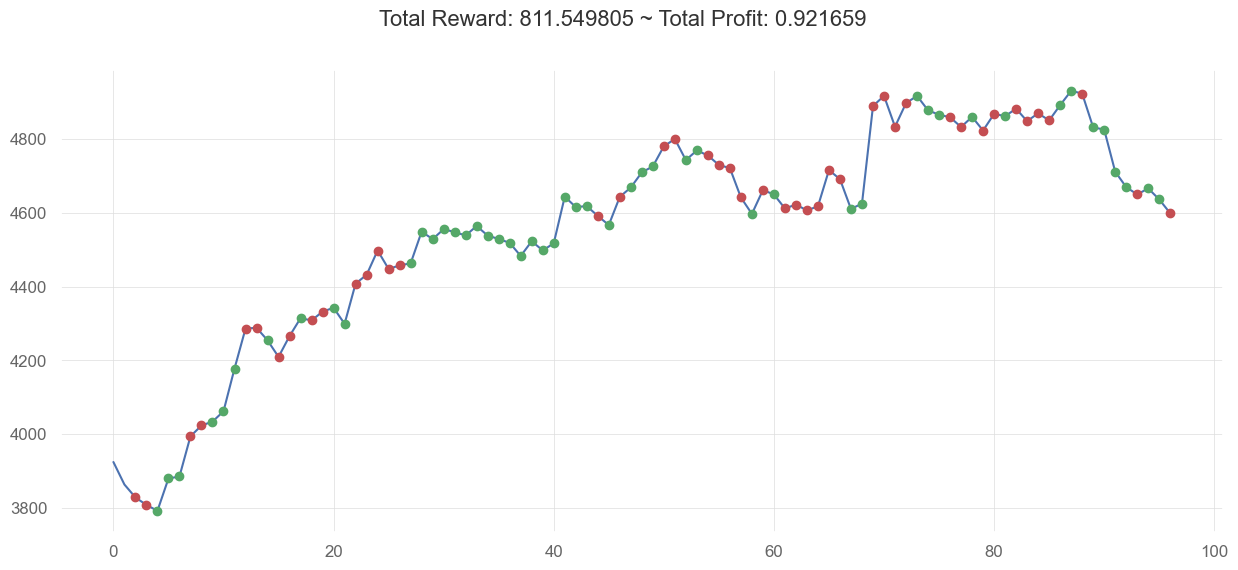

In [23]:
plt.figure(figsize = (15,6), facecolor='w')
plt.cla()
env.unwrapped.render_all()
plt.show()